#Sparks Foundation

##Name: Sakshi Singh

#***Prediction Using Supervised ML***

###PROBLEM STATEMENT

Predict Percentage of Student Based on No of Study Hours.

####Simple Linear Regression

This is problem which involves only two variable `Study Hours` and `Percentage`.
So we will perform it using simple ***Linear(univariate) Regression***.

####Importing Dependencies 

In [5]:
import os
import numpy as np  #working with numbers, arrays and tensors
import pandas as pd #working with csv and excel file data
import matplotlib.pyplot as plt #for data visualisation
import tensorflow as tf #framework
import seaborn as sns #data visualization and styling
from tensorflow import keras #API
%matplotlib inline


In [6]:
StuData=pd.read_csv('http://bit.ly/w-data')
print("Data is successfully loaded")

Data is successfully loaded


In [7]:
StuData.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
if StuData.isnull().sum().all() == 0:
  print("Data contains no null values.")

Data contains no null values.


#####We can observe that our data contains no Null Values.

###DATA VISUALIZATION

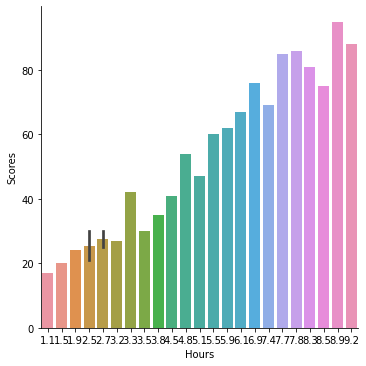

In [9]:
sns.catplot(data=StuData, kind="bar", x="Hours", y="Scores")

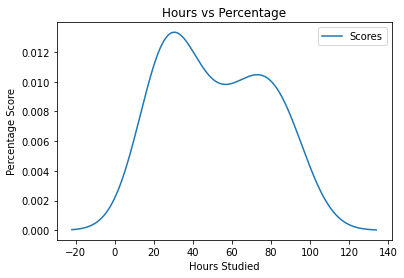

In [10]:
StuData.plot(x='Hours',y='Scores',kind='kde')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()


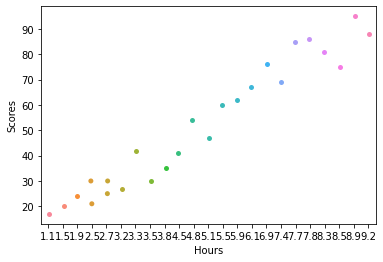

In [11]:
sns.stripplot(x='Hours',y='Scores',data=StuData, jitter=True)

***This Graph represents a linear relation between both the variable.***

####Splitting of Data

In [12]:
trainDataset = StuData.sample(frac=0.8, random_state=0) 
testDataset = StuData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

    Hours  Scores
5     1.5      20
2     3.2      27
19    7.4      69
16    2.5      30
11    5.9      62
    Hours  Scores
0     2.5      21
3     8.5      75
12    4.5      41
15    8.9      95
21    4.8      54


In [13]:
print(trainDataset.shape)
print(testDataset.shape)

(20, 2)
(5, 2)


In [14]:
trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

    Hours  Scores
5     1.5      20
2     3.2      27
19    7.4      69
16    2.5      30
11    5.9      62
    Hours  Scores
0     2.5      21
3     8.5      75
12    4.5      41
15    8.9      95
21    4.8      54


In [15]:

trainLabels = trainFeatures.pop('Scores')
testLabels = testFeatures.pop('Scores')

print(trainLabels.head())
print(testLabels.head())

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64
0     21
3     75
12    41
15    95
21    54
Name: Scores, dtype: int64


In [16]:
print(trainFeatures.head())
print(testFeatures.head())

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9
    Hours
0     2.5
3     8.5
12    4.5
15    8.9
21    4.8


In [17]:
testFeatures.shape

(5, 1)

####MODEL 1

####Training Data

In [19]:
X = StuData.iloc[:, :-1].values  
y = StuData.iloc[:, 1].values  

In [20]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

####Training 

In [21]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


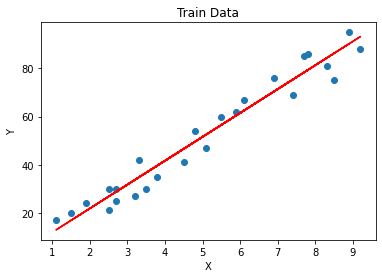

In [26]:
#Regression line
line = regressor.coef_*X+regressor.intercept_

#Test Data
plt.scatter(X, y)
plt.plot(X, line,color='red');
plt.title("Train Data")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [30]:
print(X_test) # Testing data
print("Predicted Scores:")

y_pred = regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
Predicted Scores:


######Comparing Actual and Predicted

In [32]:
dataFrame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dataFrame 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#####Testing own Data

In [43]:
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(*hours," "))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [9.25]
Predicted Score = 93.69173248737539


#####Evaluation of Errors

In [44]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


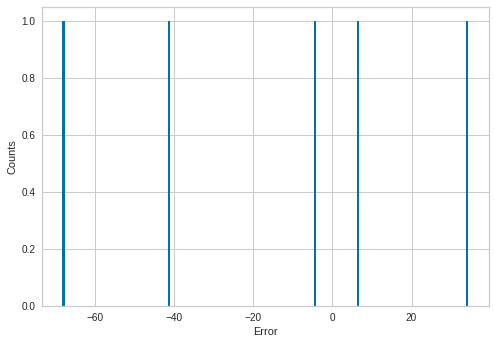

In [52]:
def errorPlot(preds, labels):
  errors = preds - labels
  plt.hist(errors, 200)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(y_pred, testLabels)

####*Model 2*

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

In [ ]:
model.compile(
    loss='mean_absolute_error',
    optimizer= tf.keras.optimizers.SGD(learning_rate=0.1,momentum=0.001,nesterov=False,name="SGD"),
    metrics=['mae','mse']
)

In [ ]:
numEpochs = 600
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/600
1/1 [==============================] - 0s 491ms/step - loss: 45.1470 - mae: 45.1470 - mse: 2516.4912 - val_loss: 39.8456 - val_mae: 39.8456 - val_mse: 1949.9860
Epoch 2/600
1/1 [==============================] - 0s 24ms/step - loss: 42.5068 - mae: 42.5068 - mse: 2230.1553 - val_loss: 37.2381 - val_mae: 37.2381 - val_mse: 1709.7986
Epoch 3/600
1/1 [==============================] - 0s 25ms/step - loss: 39.8640 - mae: 39.8640 - mse: 1961.0470 - val_loss: 34.6306 - val_mae: 34.6306 - val_mse: 1485.6666
Epoch 4/600
1/1 [==============================] - 0s 24ms/step - loss: 37.2212 - mae: 37.2212 - mse: 1709.4609 - val_loss: 32.0231 - val_mae: 32.0231 - val_mse: 1277.5902
Epoch 5/600
1/1 [==============================] - 0s 27ms/step - loss: 34.5784 - mae: 34.5784 - mse: 1475.3973 - val_loss: 29.4156 - val_mae: 29.4156 - val_mse: 1085.5696
Epoch 6/600
1/1 [==============================] - 0s 27ms/step - loss: 31.9356 - mae: 31.9356 - mse: 1258.8562 - val_loss: 26.8082 - val_m

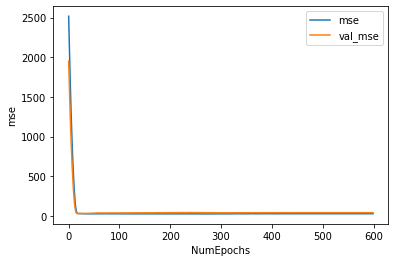

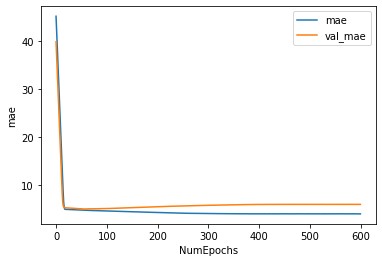

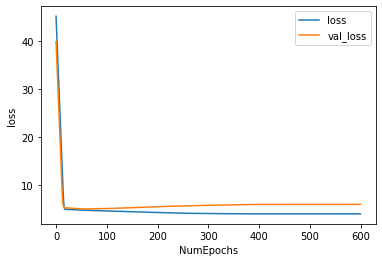

In [ ]:
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [ ]:
print(model.predict([1]))

[[16.105263]]


In [ ]:
testPreds = model.predict(testFeatures).flatten()
print(testPreds)
print(testLabels)

[29.612541 83.641655 38.617393 56.627098 31.413511 47.622246 87.24359
 62.03001  31.413511 50.323704]
0     21
3     75
4     30
7     60
9     25
12    41
15    95
18    67
20    30
21    54
Name: Scores, dtype: int64


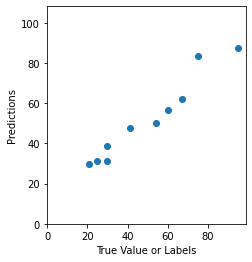

In [ ]:
def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

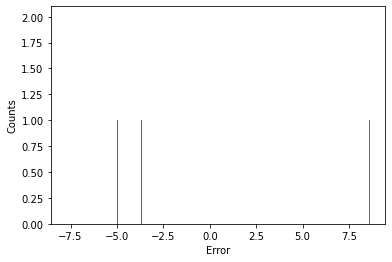

In [ ]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)

In [ ]:
temp=[9.25]
Sc=model.predict(temp).flatten()
print("Score for Study hour 9.25:", *Sc,sep=" ")

Score for Study hour 9.25: 90.395294


#THANK YOU